In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [2]:
import scipy

In [3]:
import pandas as pd

In [4]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [5]:
from scipy.interpolate import interp1d

In [6]:
from dvr_setup_and_plotting_utils import *

78.5576
potential written
dvr is set up


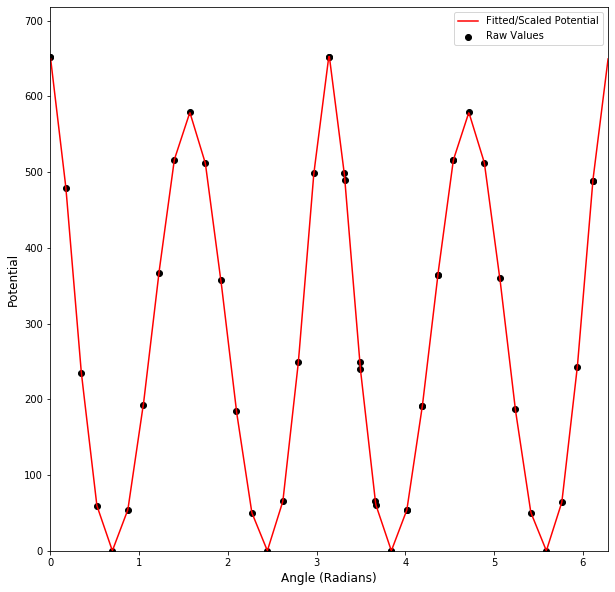

In [8]:
# Run and collect ground state

# Reduced mass of freqency calculation =  3.5708    AMU

mass_ground = 3.5708*1836*22
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500


fit_linear_potential_assume_periodic_write_to_file(raw_potential_filename='gs_scan_no_water_raw_pot.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_no_water_fitted.dat',
                        output_file_name='gs_scan_no_h2o')

print('dvr is set up')
# Now need to make the output potential the potential_file.dat and run 
# ./dvr_1d_periodic

In [9]:
# At this point in the directory where the files are made
# ! cp gs_scan_no_water_fitted.dat  potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


78.72919999999999
potential written
dvr is set up


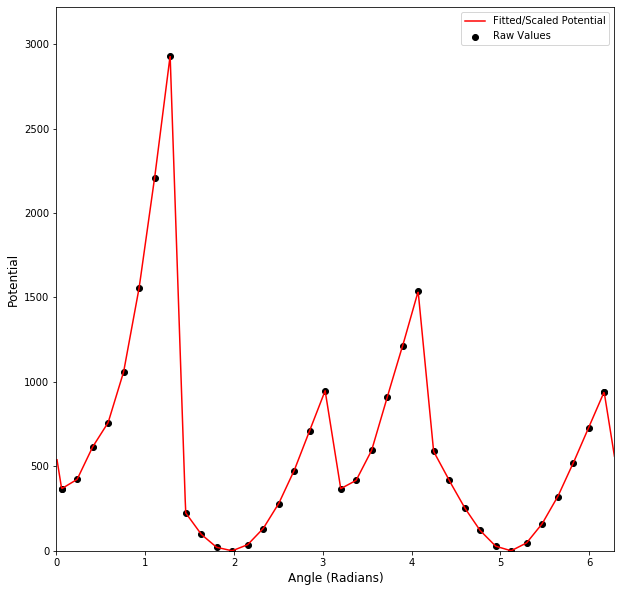

In [11]:
# run DVR
# Now run excited state

mass_excited =   3.5786*1836*22
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

# Trying pure linear interpolation. The old cubic spline is below
#fit_potential_assume_periodic_write_to_file(raw_potential_filename='kidwell_es_scan_with_water_raw_pot_with_zpe.dat',num_grid_points=grid_points,
#                                output_potential_filename='es_scan_with_water_fitted_zpe.dat',shift_origin=0.0,scale_factor=1.0)

fit_linear_potential_assume_periodic_write_to_file(raw_potential_filename='es_scan_no_water_raw_pot.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_no_water_fitted.dat',
                        output_file_name='es_scan_no_h2o')

print('dvr is set up')

In [40]:
# At this point in the directory where the files are made
# ! cp es_scan_no_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above

In [41]:
# Absolute value of overlaps is calculated here

In [12]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_no_h2o',
                                         excited_state_file_name_root='es_scan_no_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=3000,
                                         vib_shift=263.0,
                                        vib_scale=1.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 4.837905750549311
Calculating overlap for transition with energy 53.34522400349774
Calculating overlap for transition with energy 64.10186550894461
Calculating overlap for transition with energy 106.90673436706842
Calculating overlap for transition with energy 121.79588845187683
Calculating overlap for transition with energy 161.385456645134
Calculating overlap for transition with energy 178.3738468242838
Calculating overlap for transition with energy 217.08891407210848
Calculating overlap for transition with energy 232.56613978000146
Calculating overlap for transition with energy 277.52154661802444
Calculating overlap for transition with energy 286.8191415769032
Calculating overlap for transition with energy 338.59427896532895
Calculating overlap for transition with energy 339.12444965601173
Calculating overlap for transition with energy 390.8439485897092
Calculating overlap for transitio

Calculating overlap for transition with energy 538.6864007331981
Calculating overlap for transition with energy 541.9711025806712
Calculating overlap for transition with energy 592.3016853136011
Calculating overlap for transition with energy 607.5646549630752
Calculating overlap for transition with energy 643.6647678115843
Calculating overlap for transition with energy 654.3141916157289
Calculating overlap for transition with energy 655.827166816657
Calculating overlap for transition with energy 678.1523121965993
Calculating overlap for transition with energy 696.1434437273631
Calculating overlap for transition with energy 747.7328711024771
Calculating overlap for transition with energy 748.0793364526041
Calculating overlap for transition with energy 751.7535632660321
Calculating overlap for transition with energy 775.0366522555911
Calculating overlap for transition with energy 802.8917052586174
Calculating overlap for transition with energy 818.7913612075982
Calculating overlap for tr

In [13]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_no_h2o_0',
 'excited_state_id': 'es_scan_no_h2o_0',
 'overlap': 4.677864230100518e-12}

In [14]:
overlap_df = pd.DataFrame(wavefunction_overlaps)

In [15]:
# Initial spectral plots

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


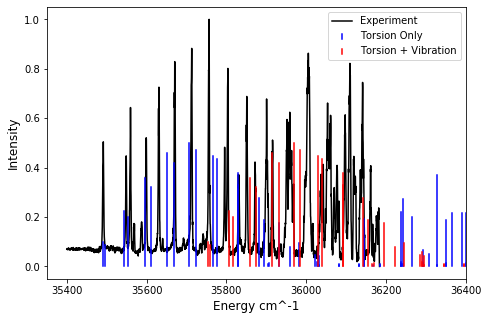

In [16]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum

offset = 35490

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36400)
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)

#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


#ax.stem(ground_vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        ground_vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='n=0 ground origin',
 #      basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_no_water_zpe_for_presentation.pdf')
plt.show()

In [17]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [18]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-100,max_freq=offset+3000,width=10.0,resolution=1.0)

In [19]:
# Plot with both spectra on each other
# Two versions, one narrow range, one wider range

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


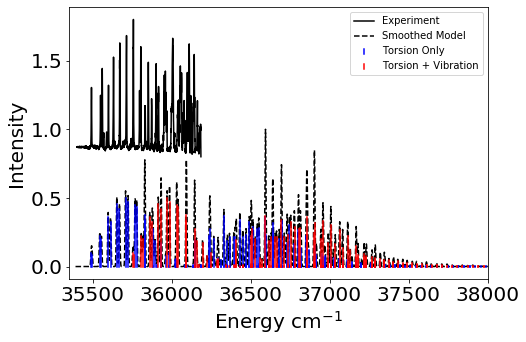

In [20]:
# Wide range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,38000)

max_freq = 38000
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_wide_range.pdf',bbox_inches='tight')
plt.show()



/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


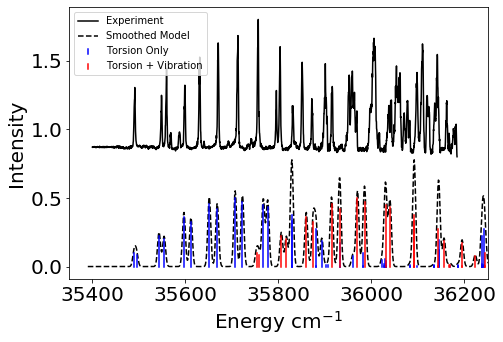

In [21]:
# Narrow Range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36250)

max_freq = 36250
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_narrow_range.pdf',bbox_inches='tight')
plt.show()



In [22]:
# Plot the lowest 4 ground state wavefunctions
ground_state_file_name_root='gs_scan_no_h2o'
excited_state_file_name_root='es_scan_no_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [23]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_no_h2o_0


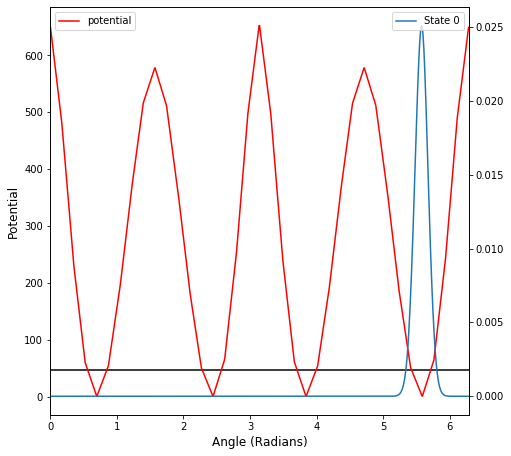

Examining state gs_scan_no_h2o_1


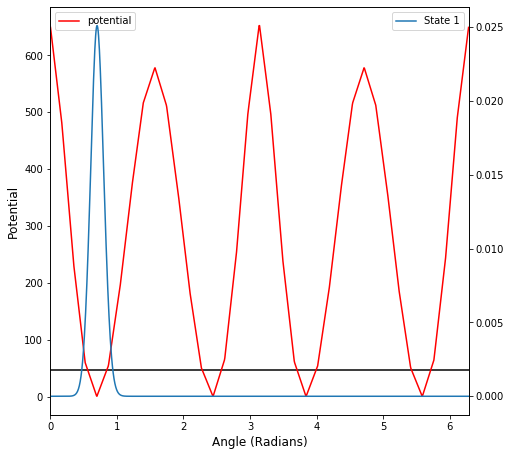

Examining state gs_scan_no_h2o_2


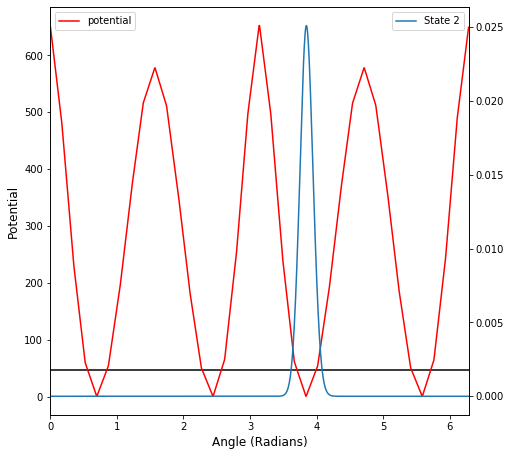

Examining state gs_scan_no_h2o_3


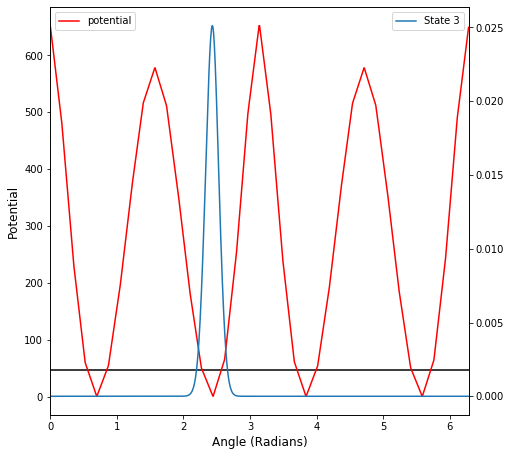

In [24]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential

wavefunction_counter = 0

max_wavefunctions = 4

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

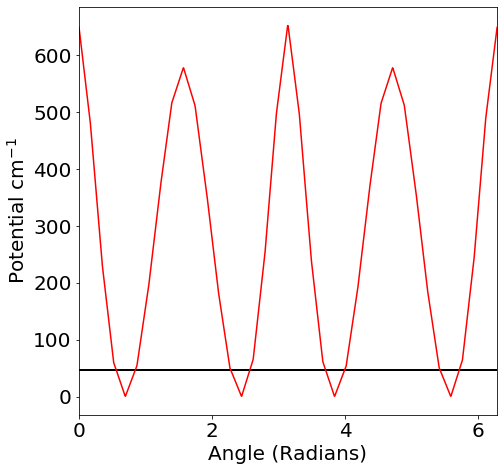

In [25]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=200)

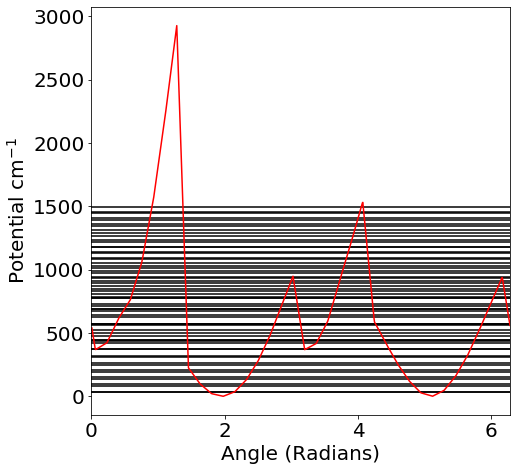

In [26]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="es_scan_no_h2o",
                      plotting_potential_name="es_scan_no_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=1500)

In [27]:
# Get maximum overlaps so we can plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(20)

,energy,ground_state_id,excited_state_id,overlap
617,0.002187,gs_scan_no_h2o_3_vib_excited,es_scan_no_h2o_8_vib_excited,0.499779
616,0.000988,gs_scan_no_h2o_3,es_scan_no_h2o_8,0.499779
19,0.002258,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_9_vib_excited,0.472855
18,0.001060,gs_scan_no_h2o_0,es_scan_no_h2o_9,0.472855
613,0.001933,gs_scan_no_h2o_3_vib_excited,es_scan_no_h2o_6_vib_excited,0.459226
612,0.000735,gs_scan_no_h2o_3,es_scan_no_h2o_6,0.459226
621,0.002462,gs_scan_no_h2o_3_vib_excited,es_scan_no_h2o_10_vib_excited,0.445326
620,0.001264,gs_scan_no_h2o_3,es_scan_no_h2o_10,0.445326
23,0.002505,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_11_vib_excited,0.436484
22,0.001307,gs_scan_no_h2o_0,es_scan_no_h2o_11,0.436484


In [29]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_overlap_list_no_zpe.csv')